In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import joblib

In [ ]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns =  {'v1':'spam?','v2':'text'},inplace=True)

In [ ]:
df.head()

,spam?,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['spam?'] = df['spam?'].map({'ham':0,'spam':1})
df['spam?'] = df['spam?'].astype('int32')

In [ ]:
df.dtypes

spam?     int32
text     object
dtype: object

In [ ]:
df['text_length'] = df['text'].apply(len)

In [ ]:
df.head()

,spam?,text,text_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.describe()

,spam?,text_length
count,5572.000000,5572.000000
mean,0.134063,80.118808
std,0.340751,59.690841
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,121.000000
max,1.000000,910.000000


<Axes: xlabel='spam?', ylabel='count'>

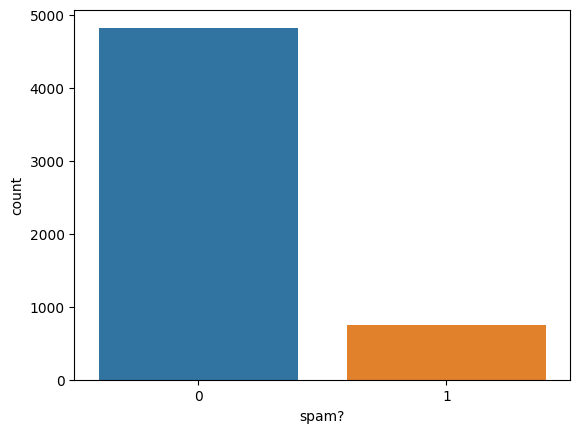

In [ ]:
sns.countplot(x=df['spam?'])

In [ ]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,spam?,text_length
spam?,1.000000,0.387285
text_length,0.387285,1.000000


In [ ]:
for i in df['text']:
  if len(i) == 910:
    print(i)

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [ ]:

import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer




In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,spam?,text,text_length,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df.describe()

,spam?,text_length,num_words
count,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390
std,0.340751,59.690841,13.741932
min,0.000000,2.000000,1.000000
25%,0.000000,36.000000,9.000000
50%,0.000000,61.000000,15.000000
75%,0.000000,121.000000,27.000000
max,1.000000,910.000000,220.000000


In [ ]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,spam?,text_length,num_words
spam?,1.000000,0.387285,0.263221
text_length,0.387285,1.000000,0.966310
num_words,0.263221,0.966310,1.000000


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,spam?,text,text_length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,spam?,text_length,num_words,num_sentences
spam?,1.000000,0.387285,0.263221,0.265332
text_length,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sentences,0.265332,0.631881,0.685165,1.000000


In [ ]:
df.describe()

,spam?,text_length,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [ ]:
#Text Cleaning 
stemmer = PorterStemmer()


corpus = []
for i in range(len(df)):
  spam = re.sub('[^a-zA-Z]',' ',df['text'][i])
  spam = spam.lower()
  spam = spam.split()
    
  spam = [stemmer.stem(word) for word in spam if not word in set(stopwords.words('english'))]
  spam = ' '.join(spam)
    
  corpus.append(spam)

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [ ]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train,y_train)
mb_pred = mb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,mb_pred))

0.9802631578947368


In [ ]:
print(confusion_matrix(y_test,mb_pred))

[[1441   23]
 [  10  198]]


In [ ]:
print(classification_report(y_test,mb_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1464
           1       0.90      0.95      0.92       208

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(accuracy_score(y_test,lr_pred))

0.9778708133971292


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print(accuracy_score(y_test,dt_pred))

0.9671052631578947


In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print(accuracy_score(y_test,gb_pred))

0.8582535885167464


In [ ]:
#Applying Voting Classifier

estimators = [('lr',lr),('mb',mb),('gb',gb),('dt',dt)]

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

vc = VotingClassifier(estimators = estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))


0.98


In [ ]:
vc_soft = VotingClassifier(estimators = estimators,voting='soft')
x = cross_val_score(vc_soft,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))


0.99


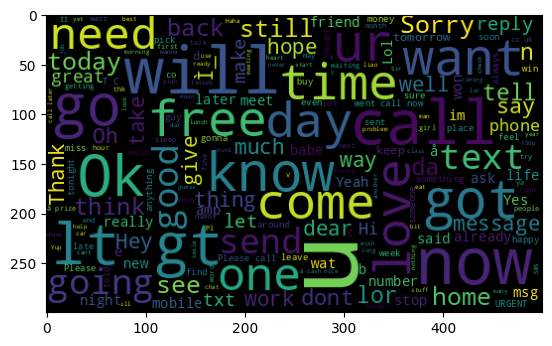

In [ ]:
from wordcloud import WordCloud

all_messages = ' '.join(df['text'])
wordCloud = WordCloud(width=500,height=300,random_state=20,max_font_size=100).generate(all_messages)

plt.imshow(wordCloud)
plt.show()

In [ ]:
import pickle 

with open('model_pickle','wb') as f:
  pickle.dump(lr,f)

with open('model_pickle','rb') as f:
  mp = pickle.load(f)